**Hypothesis(0):**

**Hypothesis:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
corpus_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_corpus_27feb.xlsx')
austin_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_austin_27feb.xlsx')
houston_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_houston_27feb.xlsx')

In [4]:
corpus_air.columns

Index(['Date', 'Year', 'Month', 'ppt_in', 'Daily_Mean_PM_2_5_Concentration'], dtype='object')

<ipython-input-7-55f27af7593e>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed


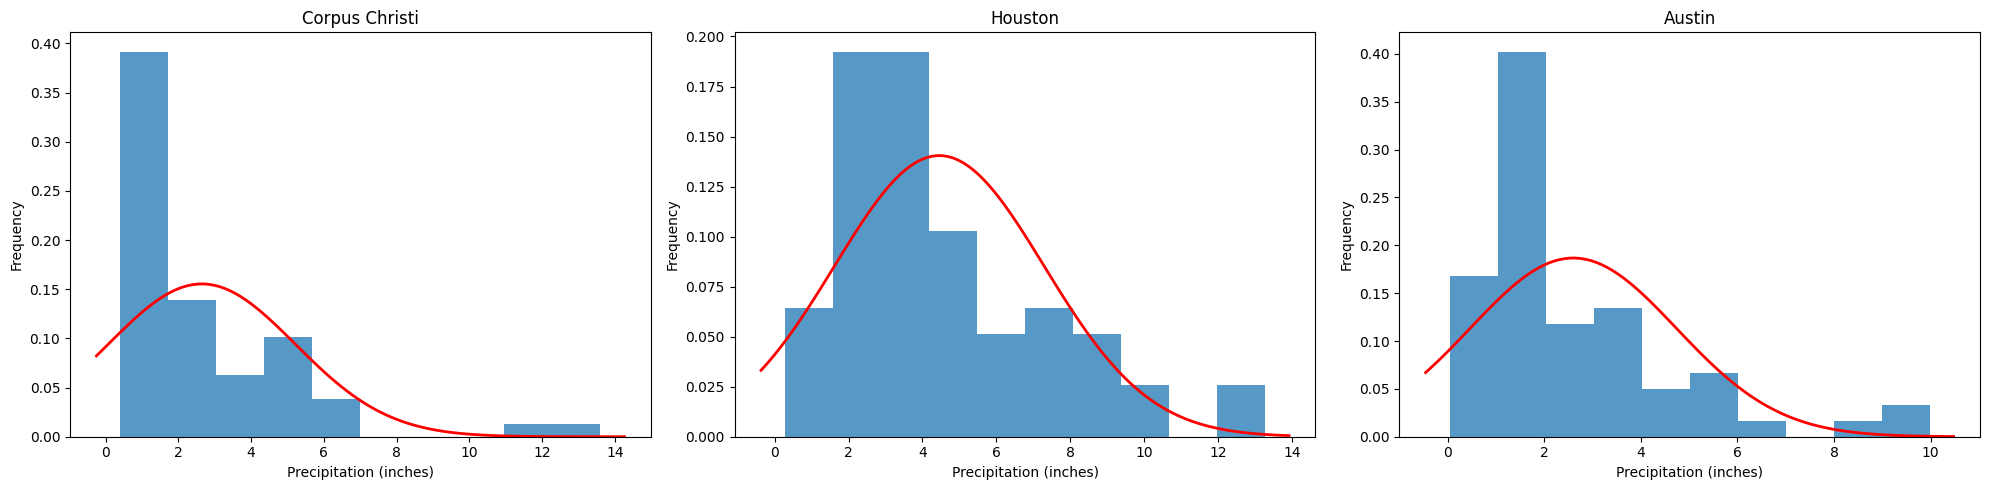

In [7]:
from scipy.stats import norm

# Assuming my data frames are named correctly as mentioned
data_frames = {
    'Corpus Christi': corpus_air,
    'Houston': houston_air,
    'Austin': austin_air
}

# Setting up the figure and axes for the histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust the figsize as needed

# Flatten the axes array to iterate over it correctly
axes_flat = axes.flatten()

# Loop through the data frames and plot histograms on the flattened axes
for ax, (city, df) in zip(axes_flat, data_frames.items()):
    # Plot histogram
    data = df['ppt_in'].dropna()  # Drop NaN values for the histogram
    n, bins, patches = ax.hist(data, bins=10, alpha=0.75, density=True)  # Use density=True for normalization

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve (normal distribution curve)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed

    # Set titles and labels
    ax.set_title(f'{city}')
    ax.set_xlabel('Precipitation (inches)')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [9]:
from scipy.stats import shapiro
#Let's test the normality of data

# Data frames for each city
data_frames = {

    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Perform Shapiro-Wilk test for normality on the ppt_in column for each city
shapiro_results = {}

for city, df in data_frames.items():
    stat, p = shapiro(df['ppt_in'])
    shapiro_results[city] = (stat, p)
    print(f"{city}:\nShapiro-Wilk Test Statistic = {stat}, p-value = {p}\n")

# Inspecting the results
for city, (stat, p) in shapiro_results.items():
    if p > 0.05:
        print(f"The precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The precipitation data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi:
Shapiro-Wilk Test Statistic = 0.7431988716125488, p-value = 6.65330901483685e-09

Austin:
Shapiro-Wilk Test Statistic = 0.8268986940383911, p-value = 6.76144850331184e-07

Houston:
Shapiro-Wilk Test Statistic = 0.9104131460189819, p-value = 0.0003222348168492317

The precipitation data for Corpus Christi does not appear to be normally distributed (reject H0).
The precipitation data for Austin does not appear to be normally distributed (reject H0).
The precipitation data for Houston does not appear to be normally distributed (reject H0).


<ipython-input-8-f5b1a742a125>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed


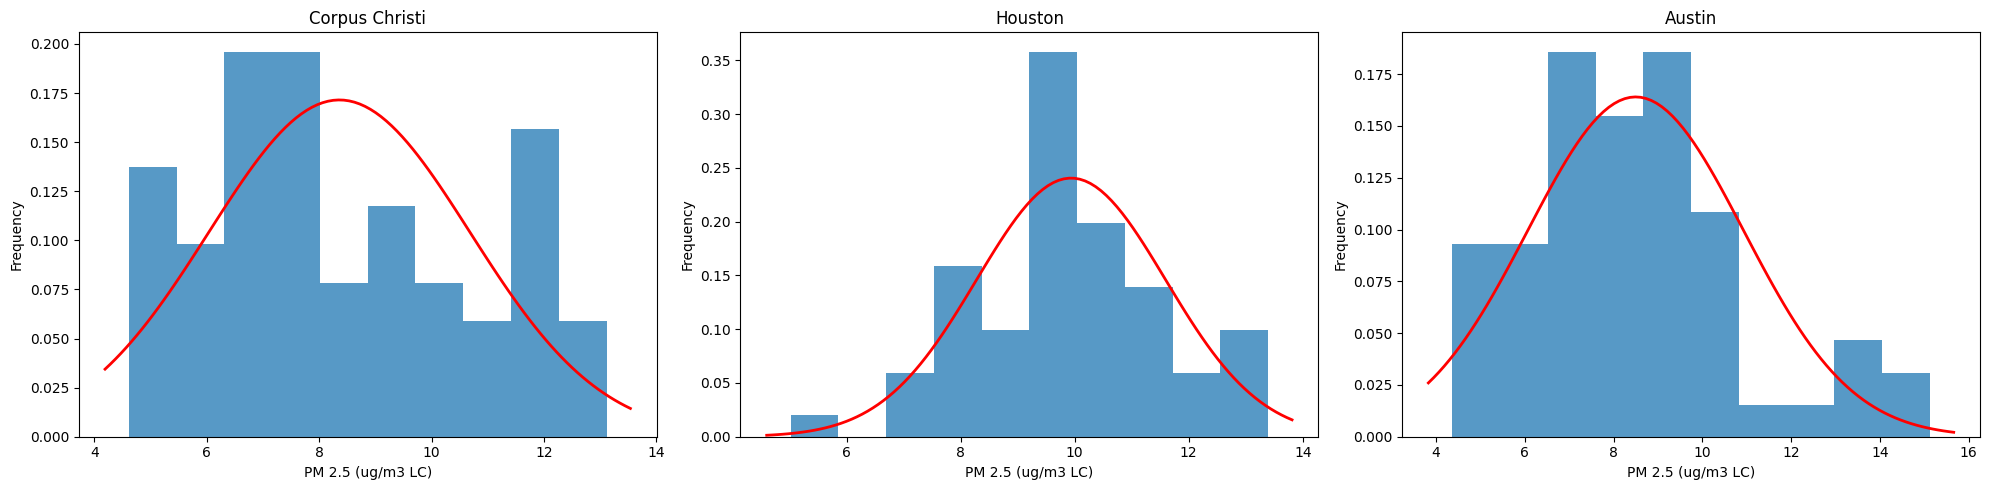

In [8]:
from scipy.stats import norm

# Assuming my data frames are named correctly as mentioned
data_frames = {
    'Corpus Christi': corpus_air,
    'Houston': houston_air,
    'Austin': austin_air
}

# Setting up the figure and axes for the histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust the figsize as needed

# Flatten the axes array to iterate over it correctly
axes_flat = axes.flatten()

# Loop through the data frames and plot histograms on the flattened axes
for ax, (city, df) in zip(axes_flat, data_frames.items()):
    # Plot histogram
    data = df['Daily_Mean_PM_2_5_Concentration'].dropna()  # Drop NaN values for the histogram
    n, bins, patches = ax.hist(data, bins=10, alpha=0.75, density=True)  # Use density=True for normalization

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve (normal distribution curve)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed

    # Set titles and labels
    ax.set_title(f'{city}')
    ax.set_xlabel('PM 2.5 (ug/m3 LC)')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [10]:
from scipy.stats import shapiro
#Let's test the normality of data

# Data frames for each city
data_frames = {

    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Perform Shapiro-Wilk test for normality on the ppt_in column for each city
shapiro_results = {}

for city, df in data_frames.items():
    stat, p = shapiro(df['Daily_Mean_PM_2_5_Concentration'])
    shapiro_results[city] = (stat, p)
    print(f"{city}:\nShapiro-Wilk Test Statistic = {stat}, p-value = {p}\n")

# Inspecting the results
for city, (stat, p) in shapiro_results.items():
    if p > 0.05:
        print(f"The PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi:
Shapiro-Wilk Test Statistic = 0.9542403817176819, p-value = 0.024758266285061836

Austin:
Shapiro-Wilk Test Statistic = 0.9561682343482971, p-value = 0.03064909018576145

Houston:
Shapiro-Wilk Test Statistic = 0.9796170592308044, p-value = 0.4125528633594513

The PM 2.5 data for Corpus Christi does not appear to be normally distributed (reject H0).
The PM 2.5 data for Austin does not appear to be normally distributed (reject H0).
The PM 2.5 data for Houston seems to be normally distributed (fail to reject H0).


In [11]:
from scipy.stats import shapiro

# Data frames for each city
data_frames = {
    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Function to safely compute the logarithm (adding a small constant to avoid log(0))
def safe_log(x, minval=0.01):
    return np.log(x + minval)

# Perform Shapiro-Wilk test for normality on the log and sqrt of ppt_in column for each city
shapiro_results_log = {}
shapiro_results_sqrt = {}

for city, df in data_frames.items():
    # Log transformation (assuming ppt_in > 0)
    df['ppt_in_log'] = safe_log(df['ppt_in'])
    stat_log, p_log = shapiro(df['ppt_in_log'])
    shapiro_results_log[city] = (stat_log, p_log)

    # Sqrt transformation
    df['ppt_in_sqrt'] = np.sqrt(df['ppt_in'])
    stat_sqrt, p_sqrt = shapiro(df['ppt_in_sqrt'])
    shapiro_results_sqrt[city] = (stat_sqrt, p_sqrt)

    print(f"{city} Log:\nShapiro-Wilk Test Statistic = {stat_log}, p-value = {p_log}")
    print(f"{city} Sqrt:\nShapiro-Wilk Test Statistic = {stat_sqrt}, p-value = {p_sqrt}\n")

# Inspecting the results for log transformation
print("Log Transformation Results:")
for city, (stat, p) in shapiro_results_log.items():
    if p > 0.05:
        print(f"The log-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The log-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")

# Inspecting the results for sqrt transformation
print("\nSqrt Transformation Results:")
for city, (stat, p) in shapiro_results_sqrt.items():
    if p > 0.05:
        print(f"The sqrt-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The sqrt-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi Log:
Shapiro-Wilk Test Statistic = 0.9597998261451721, p-value = 0.046002041548490524
Corpus Christi Sqrt:
Shapiro-Wilk Test Statistic = 0.8831697702407837, p-value = 3.381424176041037e-05

Austin Log:
Shapiro-Wilk Test Statistic = 0.9366022944450378, p-value = 0.0038282363675534725
Austin Sqrt:
Shapiro-Wilk Test Statistic = 0.9538090229034424, p-value = 0.02360888384282589

Houston Log:
Shapiro-Wilk Test Statistic = 0.9625805616378784, p-value = 0.06295744329690933
Houston Sqrt:
Shapiro-Wilk Test Statistic = 0.9804133176803589, p-value = 0.44626927375793457

Log Transformation Results:
The log-transformed precipitation data for Corpus Christi does not appear to be normally distributed (reject H0).
The log-transformed precipitation data for Austin does not appear to be normally distributed (reject H0).
The log-transformed precipitation data for Houston seems to be normally distributed (fail to reject H0).

Sqrt Transformation Results:
The sqrt-transformed precipitation d

In [14]:
from scipy.stats import shapiro

# Data frames for each city
data_frames = {
    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Function to safely compute the logarithm (adding a small constant to avoid log(0))
def safe_log(x, minval=0.01):
    return np.log(x + minval)

# Perform Shapiro-Wilk test for normality on the log and sqrt of ppt_in column for each city
shapiro_results_log = {}
shapiro_results_sqrt = {}

for city, df in data_frames.items():
    # Log transformation (assuming ppt_in > 0)
    df['Daily_Mean_PM_2_5_Concentration_log'] = safe_log(df['Daily_Mean_PM_2_5_Concentration'])
    stat_log, p_log = shapiro(df['Daily_Mean_PM_2_5_Concentration_log'])
    shapiro_results_log[city] = (stat_log, p_log)

    # Sqrt transformation
    df['Daily_Mean_PM_2_5_Concentration_sqrt'] = np.sqrt(df['Daily_Mean_PM_2_5_Concentration'])
    stat_sqrt, p_sqrt = shapiro(df['Daily_Mean_PM_2_5_Concentration_sqrt'])
    shapiro_results_sqrt[city] = (stat_sqrt, p_sqrt)

    print(f"{city} Log:\nShapiro-Wilk Test Statistic = {stat_log}, p-value = {p_log}")
    print(f"{city} Sqrt:\nShapiro-Wilk Test Statistic = {stat_sqrt}, p-value = {p_sqrt}\n")

# Inspecting the results for log transformation
print("Log Transformation Results:")
for city, (stat, p) in shapiro_results_log.items():
    if p > 0.05:
        print(f"The log-transformed PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The log-transformed PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")

# Inspecting the results for sqrt transformation
print("\nSqrt Transformation Results:")
for city, (stat, p) in shapiro_results_sqrt.items():
    if p > 0.05:
        print(f"The sqrt-transformed PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The sqrt-transformed PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi Log:
Shapiro-Wilk Test Statistic = 0.9617359638214111, p-value = 0.05722285807132721
Corpus Christi Sqrt:
Shapiro-Wilk Test Statistic = 0.9620508551597595, p-value = 0.05929594486951828

Austin Log:
Shapiro-Wilk Test Statistic = 0.9828988313674927, p-value = 0.5625401735305786
Austin Sqrt:
Shapiro-Wilk Test Statistic = 0.9779966473579407, p-value = 0.3497956097126007

Houston Log:
Shapiro-Wilk Test Statistic = 0.9513238668441772, p-value = 0.01798364892601967
Houston Sqrt:
Shapiro-Wilk Test Statistic = 0.9716253280639648, p-value = 0.17514987289905548

Log Transformation Results:
The log-transformed PM 2.5 data for Corpus Christi seems to be normally distributed (fail to reject H0).
The log-transformed PM 2.5 data for Austin seems to be normally distributed (fail to reject H0).
The log-transformed PM 2.5 data for Houston does not appear to be normally distributed (reject H0).

Sqrt Transformation Results:
The sqrt-transformed PM 2.5 data for Corpus Christi seems to be no

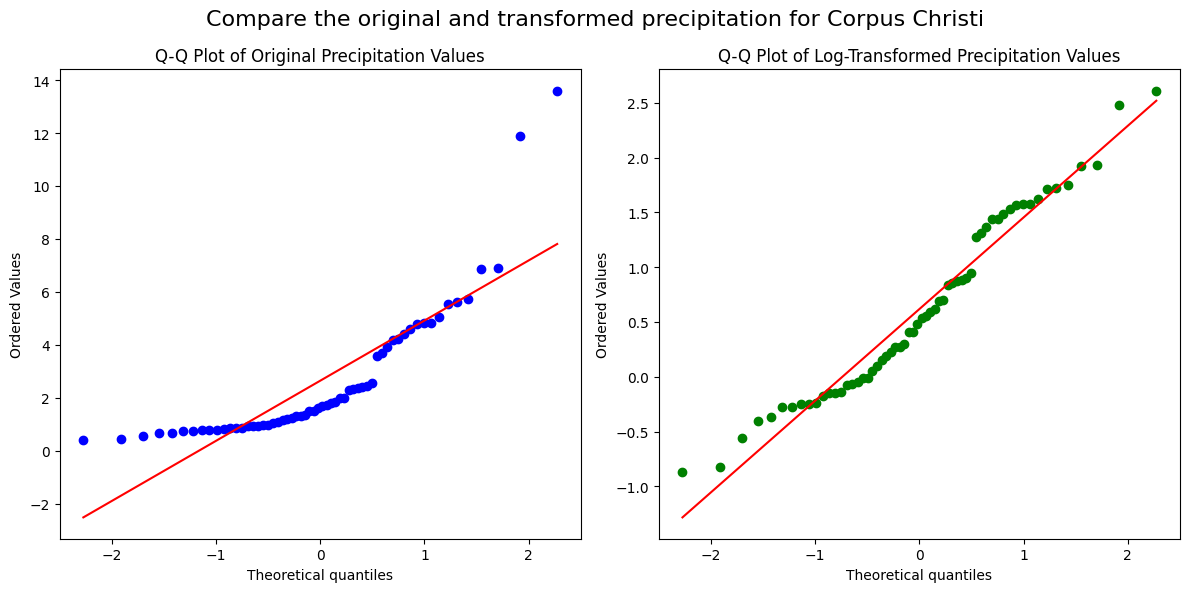

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original values Q-Q plot
probplot(corpus_air['ppt_in'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot
# Add a small constant to avoid taking the log of zero
log_ppt_in = np.log(corpus_air['ppt_in'] + 0.01)
probplot(log_ppt_in, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Log-Transformed Precipitation Values')
axes[1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1].get_lines()[1].set_color('red')   # Set the color of the line
fig.suptitle('Compare the original and transformed precipitation for Corpus Christi', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


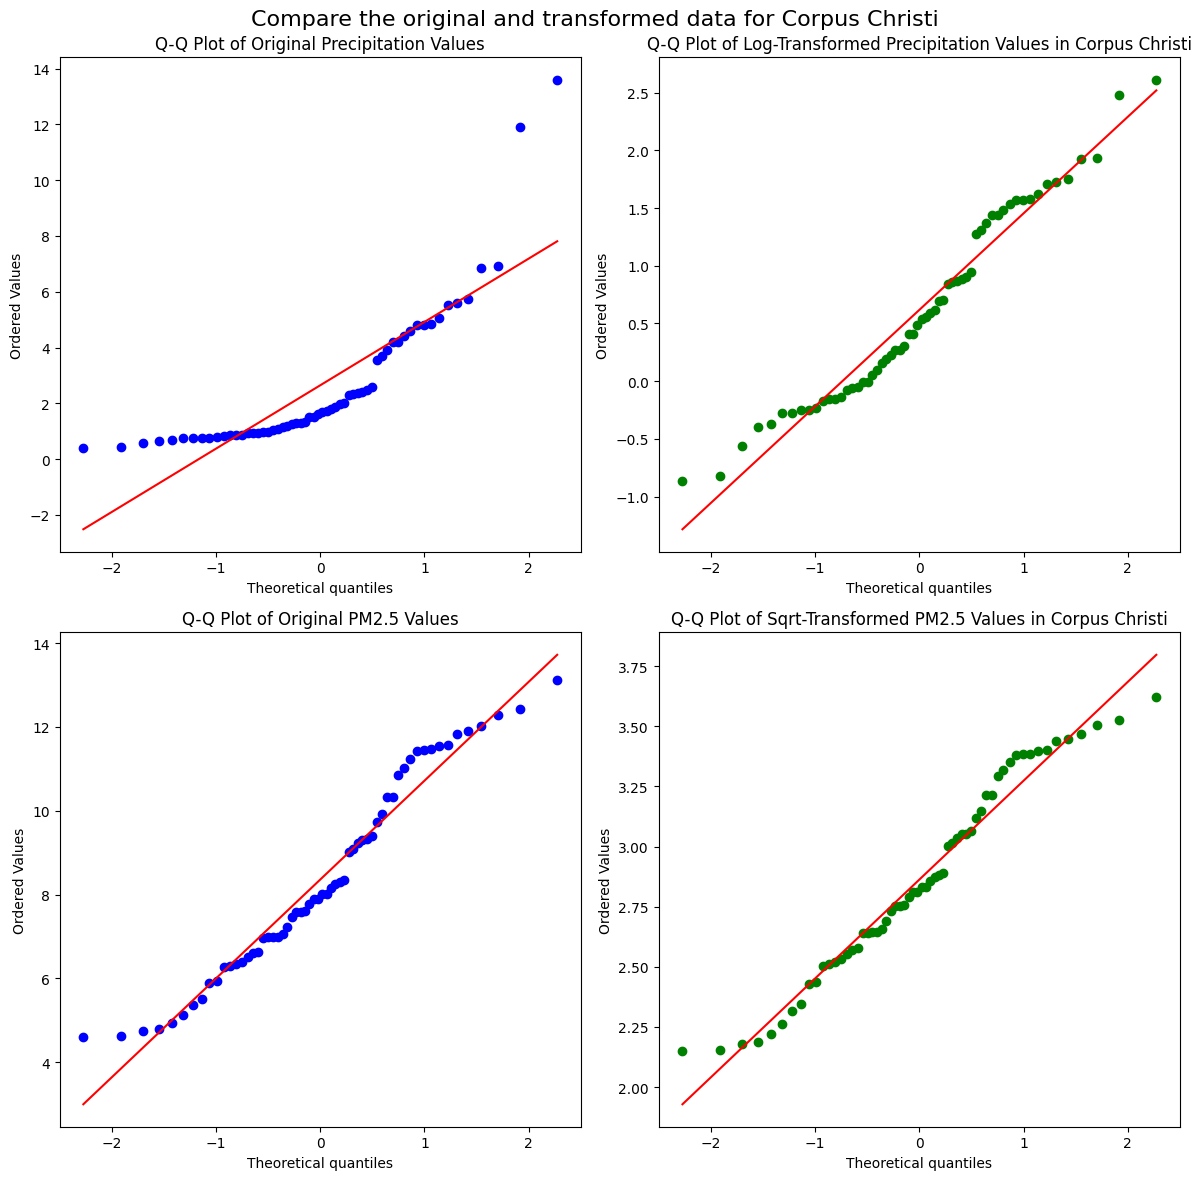

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(corpus_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Values in Corpus Christi')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(corpus_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values in Corpus Christi')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Corpus Christi', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


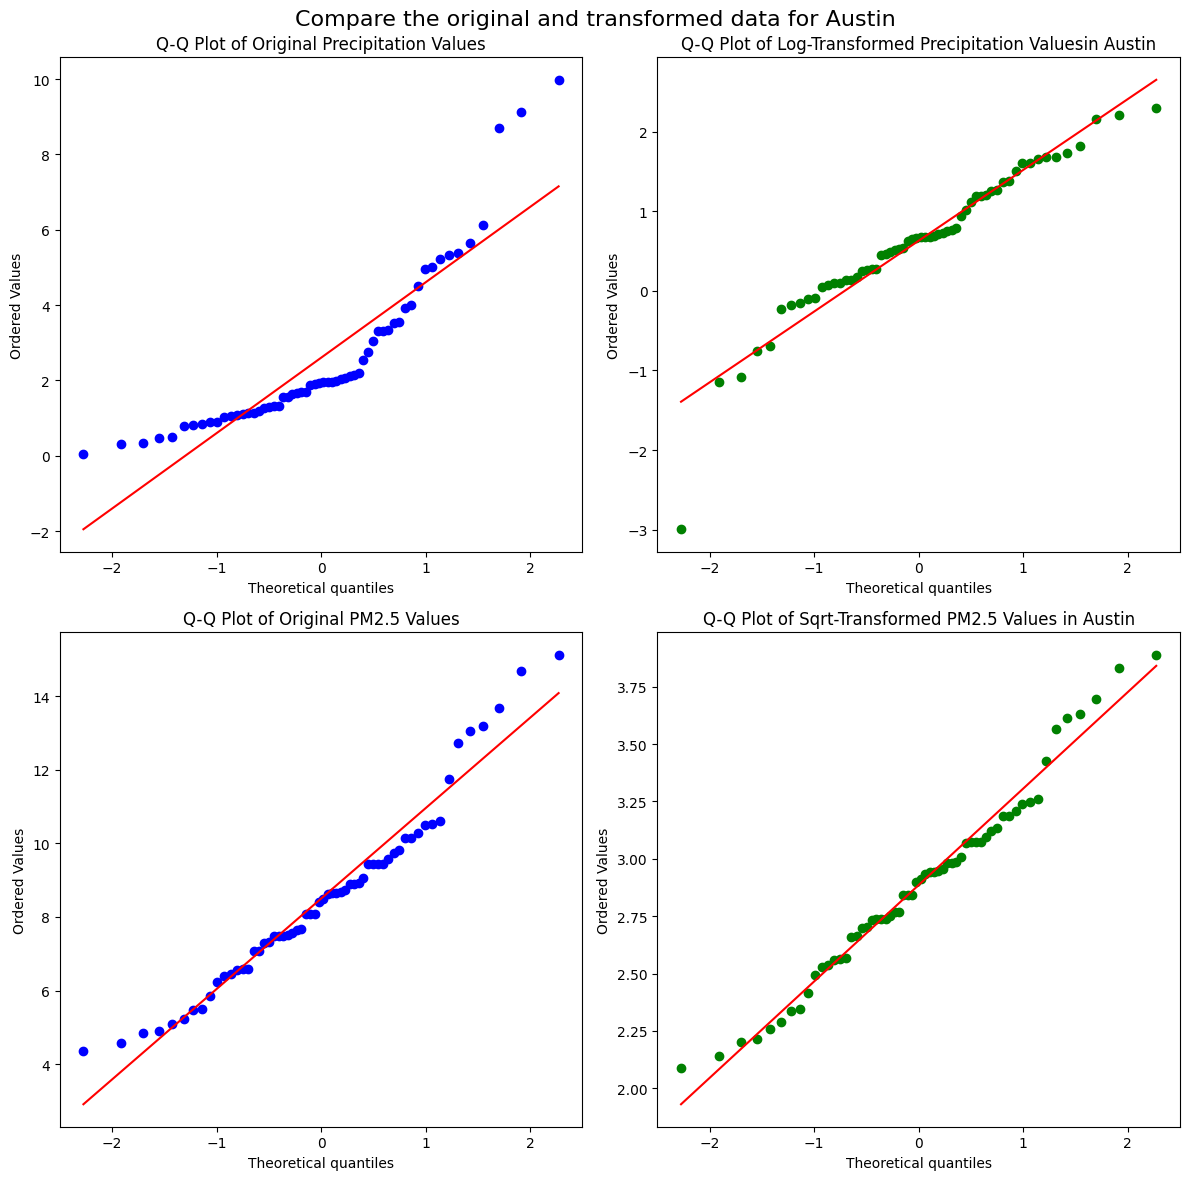

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(austin_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(austin_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Valuesin Austin')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(austin_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(austin_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values in Austin')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Austin', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


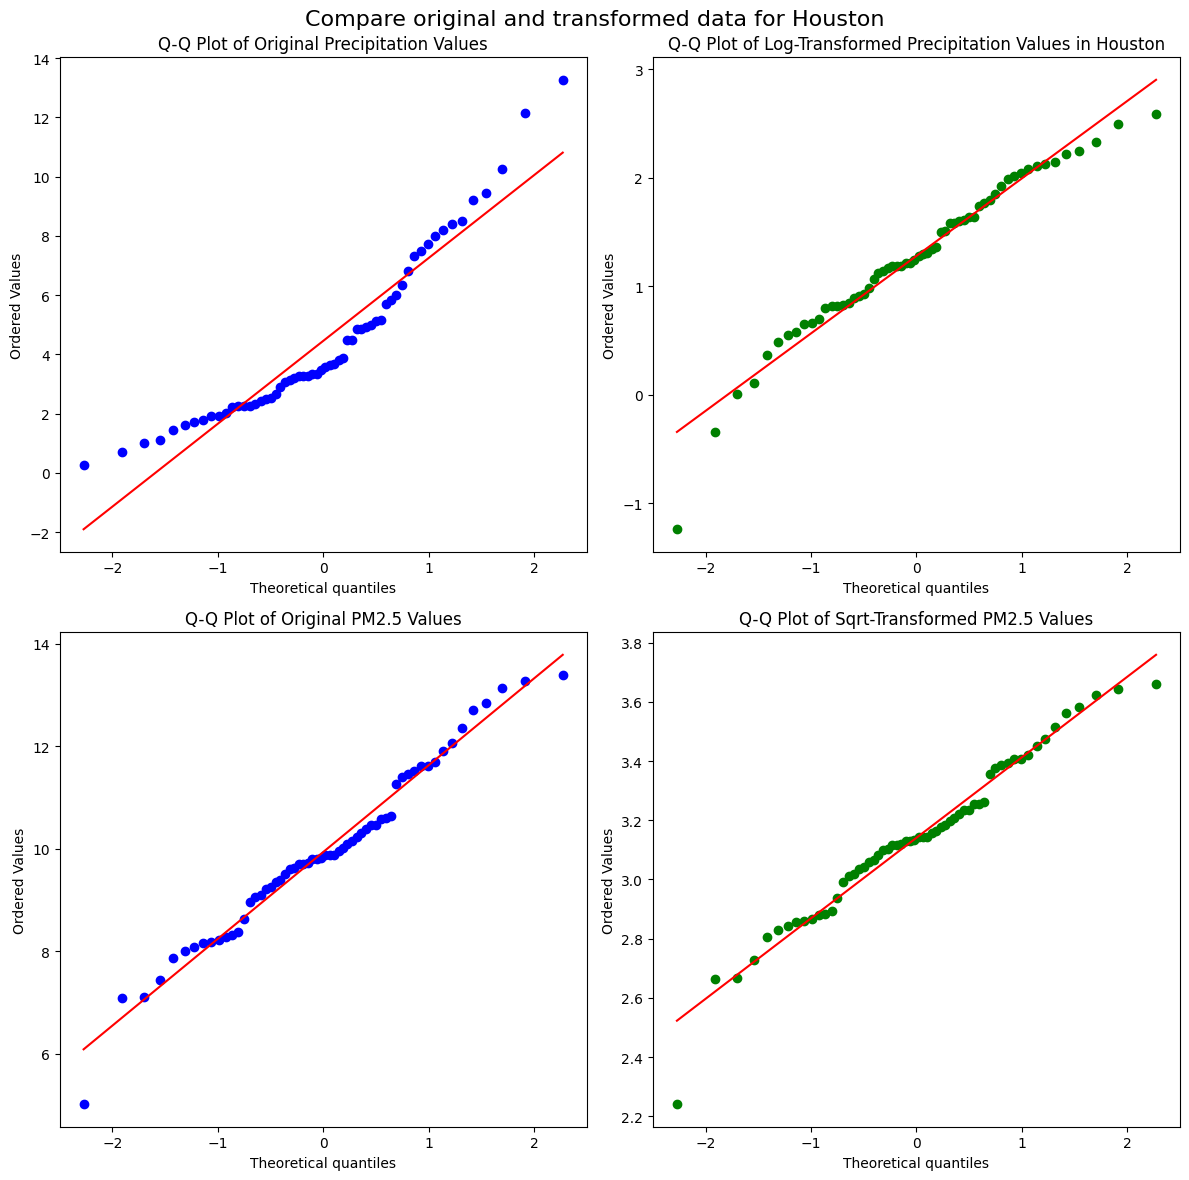

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import probplot

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(houston_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(houston_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Values in Houston')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(houston_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(houston_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Houston', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [30]:
from scipy.stats import spearmanr


# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'])
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Perform Spearman rank correlation test
spearman_corr, spearman_p_value = spearmanr(corpus_air['log_ppt_in'], corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'])

print(f"Spearman correlation coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


Spearman correlation coefficient: 0.036
P-value: 0.785


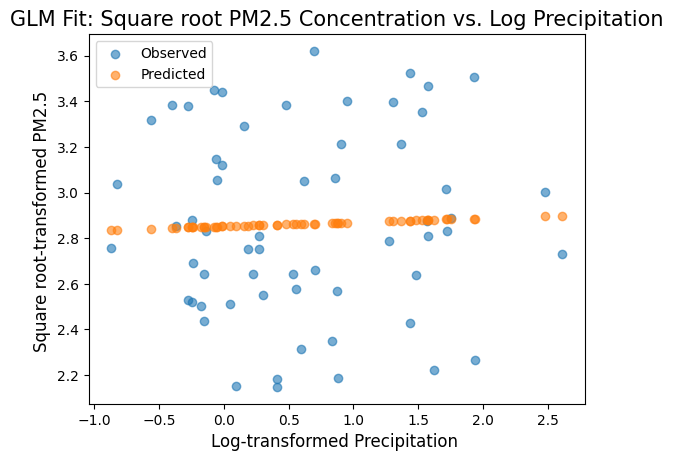

In [39]:
import statsmodels.api as sm


# Transform the variables
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation, add a small constant to avoid log(0)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Fit a GLM
# Note: GLMs are a class of models, and you need to specify the family (e.g., Gaussian, Binomial)
# For a relationship similar to linear regression, we use the Gaussian family
X = sm.add_constant(corpus_air['log_ppt_in'])  # Add a constant term for the intercept
y = corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration']
glm = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Predicted values from the model
corpus_air['predicted'] = glm.predict(X)

# Plot the observed vs predicted values
plt.scatter(corpus_air['log_ppt_in'], corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'], label='Observed', alpha=0.6)
plt.scatter(corpus_air['log_ppt_in'], corpus_air['predicted'], label='Predicted', alpha=0.6)
plt.xlabel('Log-transformed Precipitation ',fontsize=12)
plt.ylabel('Square root-transformed PM2.5 ', fontsize=12)
plt.title('GLM Fit: Square root PM2.5 Concentration vs. Log Precipitation',fontsize=15)
plt.legend()
plt.show()


In [41]:
import statsmodels.api as sm
import numpy as np

# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation with a small constant to avoid log(0)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Prepare the data for the model
X = sm.add_constant(corpus_air['log_ppt_in'])  # Add a constant term for the intercept
Y = corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration']

# Fit the GLM
model = sm.GLM(Y, X, family=sm.families.Gaussian()).fit()

# Print the summary of the model
print(model.summary())


                          Generalized Linear Model Regression Results                           
Dep. Variable:     sqrt_Daily_Mean_PM_2_5_Concentration   No. Observations:                   60
Model:                                              GLM   Df Residuals:                       58
Model Family:                                  Gaussian   Df Model:                            1
Link Function:                                 Identity   Scale:                         0.16857
Method:                                            IRLS   Log-Likelihood:                -30.708
Date:                                  Wed, 28 Feb 2024   Deviance:                       9.7773
Time:                                          10:02:59   Pearson chi2:                     9.78
No. Iterations:                                       3   Pseudo R-squ. (CS):           0.001824
Covariance Type:                              nonrobust                                         
                 coef    std e

In [44]:
from scipy.stats import ttest_rel

# Apply square root transformation to 'ppt_in'
houston_air['sqrt_ppt_in'] = np.sqrt(houston_air['ppt_in'])

# Perform the paired t-test
t_stat, p_value = ttest_rel(houston_air['Daily_Mean_PM_2_5_Concentration'], houston_air['sqrt_ppt_in'])

print(f"Paired t-test statistic: {t_stat}, p-value: {p_value}")


Paired t-test statistic: 31.55059717573326, p-value: 1.2238922875724504e-38


In [46]:
import statsmodels.api as sm

# Apply the square root transformation to 'ppt_in'
houston_air['sqrt_ppt_in'] = np.sqrt(houston_air['ppt_in'])

# Prepare the data for the model
X = houston_air['sqrt_ppt_in']  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor for the intercept
Y = houston_air['Daily_Mean_PM_2_5_Concentration']  # Response variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Daily_Mean_PM_2_5_Concentration   R-squared:                       0.064
Model:                                         OLS   Adj. R-squared:                  0.047
Method:                              Least Squares   F-statistic:                     3.938
Date:                             Wed, 28 Feb 2024   Prob (F-statistic):             0.0519
Time:                                     10:21:26   Log-Likelihood:                -113.52
No. Observations:                               60   AIC:                             231.0
Df Residuals:                                   58   BIC:                             235.2
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]


In [47]:
from scipy.stats import pearsonr


# Check for any negative values in 'Daily_Mean_PM_2_5_Concentration' and 'ppt_in' to avoid errors in log and sqrt transformations
if (austin_air['Daily_Mean_PM_2_5_Concentration'] <= 0).any() or (austin_air['ppt_in'] < 0).any():
    raise ValueError("Data contains non-positive values which are incompatible with log and sqrt transformations.")

# Apply log transformation to 'Daily_Mean_PM_2_5_Concentration' and sqrt transformation to 'ppt_in'
austin_air['log_Daily_Mean_PM_2_5_Concentration'] = np.log(austin_air['Daily_Mean_PM_2_5_Concentration'])
austin_air['sqrt_ppt_in'] = np.sqrt(austin_air['ppt_in'])

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(austin_air['log_Daily_Mean_PM_2_5_Concentration'], austin_air['sqrt_ppt_in'])

print(f"Pearson correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")


Pearson correlation coefficient: -0.079
P-value: 0.547


In [48]:
import statsmodels.api as sm

# Apply the log transformation to 'Daily_Mean_PM_2_5_Concentration' and sqrt transformation to 'ppt_in'
austin_air['log_Daily_Mean_PM_2_5_Concentration'] = np.log(austin_air['Daily_Mean_PM_2_5_Concentration'])
austin_air['sqrt_ppt_in'] = np.sqrt(austin_air['ppt_in'])

# Prepare the data for the model
X = austin_air['sqrt_ppt_in']  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor for the intercept
Y = austin_air['log_Daily_Mean_PM_2_5_Concentration']  # Response variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                                     OLS Regression Results                                    
Dep. Variable:     log_Daily_Mean_PM_2_5_Concentration   R-squared:                       0.006
Model:                                             OLS   Adj. R-squared:                 -0.011
Method:                                  Least Squares   F-statistic:                    0.3662
Date:                                 Wed, 28 Feb 2024   Prob (F-statistic):              0.547
Time:                                         10:23:53   Log-Likelihood:                -9.7119
No. Observations:                                   60   AIC:                             23.42
Df Residuals:                                       58   BIC:                             27.61
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                  coef    std err       